# Plotting and Visualization

- matplotlib은 파이썬에서 MATLAB과 유사한 인터페이스를 지원하기 위해 만들어짐
- 다양한 시각화 및 도식화 표현 가능
- 도표의 확대, 회전 같은 기능 사용 가능
- pdf, svg, jpg, png, gmp, gif 등 다양한 포맷으로 저장 가능

In [18]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [19]:
%matplotlib inline

In [20]:
%pwd

u'/home/kwangyounjung/Workspace/python-study/study_session/data_analysis/pydal/ch08'

In [4]:
%cd c:/users/administrator/desktop/pydal

c:\users\administrator\desktop\pydal


## A brief matplotlib API primer

In [21]:
import matplotlib.pyplot as plt

In [22]:
pylab

<module 'matplotlib.pylab' from '/home/kwangyounjung/.virtualenvs/pydal/lib/python2.7/site-packages/matplotlib/pylab.pyc'>

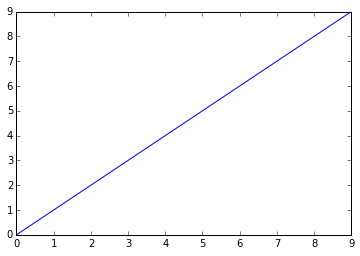

In [23]:
plot(np.arange(10))

### Figures와 Subplots

In [7]:
fig = plt.figure()

plt.figure()를 이용하여 빈 창 열기

- plt.gcf() : 현재 활성화된 Figure에 대한 참조를 나타내주는 함수

- add_sbuplot을 이용하여 최소한 하나 이상의 서브플롯을 만들어 주어야 함

In [8]:
ax1 = fig.add_subplot(2, 2, 1)

- (2,2,1)은 크기가 2x2이고 4개의 서브플롯 중 첫번째 그래프를 선택하겠다는 의미. 2,3,4로 순서를 정할 수 있다.

In [9]:
ax2 = fig.add_subplot(2, 2, 2)

In [10]:
ax3 = fig.add_subplot(2, 2, 3)

In [11]:
ax4 = fig.add_subplot(2, 2, 4)

In [12]:
from numpy.random import randn

- randn(50) : 50개의 난수 발생
- cumsum(): 누적합
- 'k--' : 검은 점선을 그리기 위한 스타일 옵션

In [13]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
plt.plot()

[]

In [14]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
plt.plot()

[]

In [15]:
plt.plot(randn(50).cumsum(), 'k--')

- ax번호를 지정해주지 않으면 가장 마지막에 열었던 서브플롯에 그래프가 그려짐

In [24]:
plt.close('all')

(<matplotlib.figure.Figure at 0xb03de2ec>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb04f5b2c>,
         <matplotlib.axes._subplots.AxesSubplot object at 0xb011a0cc>]], dtype=object))

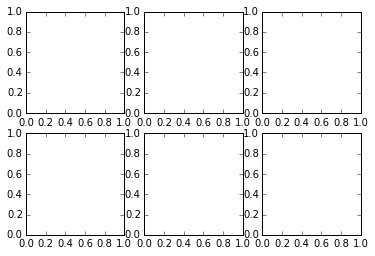

In [29]:
axes = plt.subplots(2, 3)
axes

- plt.subplots로 편리하게 서브플롯 생성가능
- help(pyplot.subplots) : 314쪽 옵션

#### subplots간 간격 조절하기

In [31]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

-subplots_adjust 메서드로 그래프의 간격과 여백 조절 가능

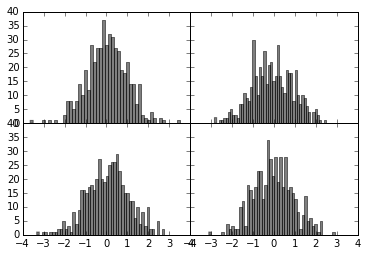

In [38]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

- sharex,sharey로 서브플롯간의 축 눈금을 같게 맞출 수 있음.
- wspace, hspace로 width,height 여백 조절 가능
- alpha: 투명도 (0<=alpha<=1)

### 색, 마커, 선 스타일 Colors, markers, and line styles

- linestyle= 선 스타일 결정
- color= 색 결정
- marker= 마커 결정

In [26]:
help(plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    An arbitrary number of *x*, *y*, *fmt* groups can be
    specified, as in::
    
        a.plot(x1, y1, 'g^', x2, y2, 'g-')
    
    Return value is a list of lines that were added.
    
    By default, each line is assigned a different color specified by a
    'color cycle'.  To change this behavior, you can 

In [39]:
plt.figure()

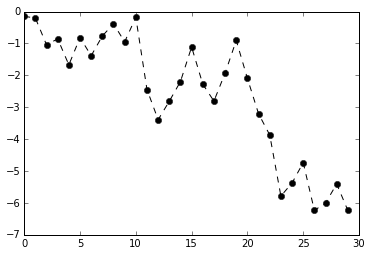

In [44]:
plt.plot(randn(30).cumsum(), 'ko--')

- 'ko--' : black + o + --
- 위와 같이 색, 선, 마커를 합쳐서 정의하면 간편하다!

In [45]:
plt.close('all')

In [46]:
data = randn(30).cumsum()

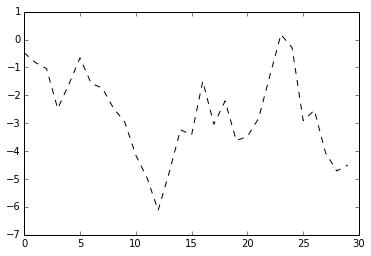

In [47]:
plt.plot(data, 'k--', label='Default')

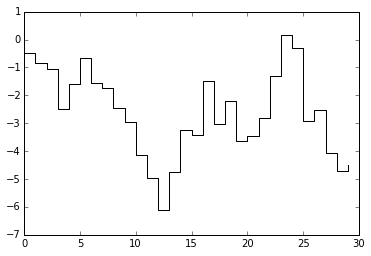

In [48]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

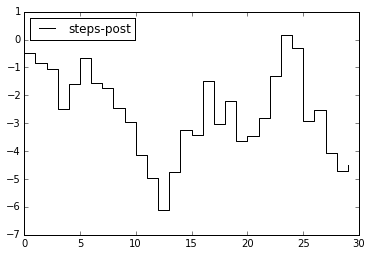

In [50]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

In [31]:
data = randn(30).cumsum()

In [32]:
plt.plot(data, 'k--', label='Default')

In [33]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [34]:
plt.legend(loc='best')

### 눈금, 라벨, 범례 Ticks, labels, and legends

#### 제목, 축 이름, 눈금, 눈금 이름 설정하기

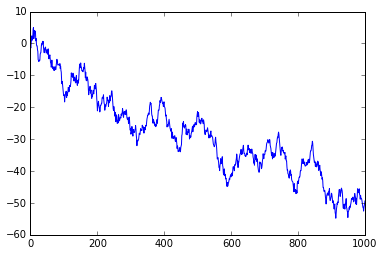

In [52]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

In [53]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

In [12]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [69]:
ax.plot(randn(1000).cumsum())
plt.plot()

[]

In [56]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
plt.plot()

[]

In [57]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
plt.plot()

[]

In [58]:
ax.set_title('My first matplotlib plot')
plt.plot()

[]

In [59]:
ax.set_xlabel('Stages')
plt.plot()

[]

#### 범례 추가하기

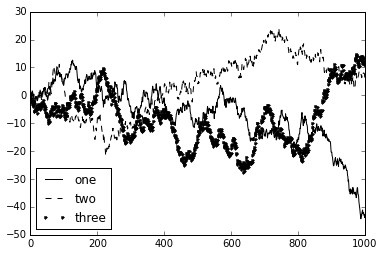

In [56]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

In [65]:
fig = plt.figure()

In [66]:
ax = fig.add_subplot(1, 1, 1)

[]

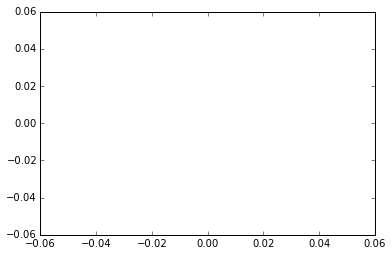

In [67]:
ax.plot(randn(1000).cumsum(), 'k', label='one')
plt.plot()

[]

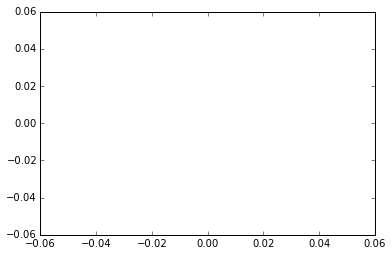

In [68]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')
plt.plot()

[]

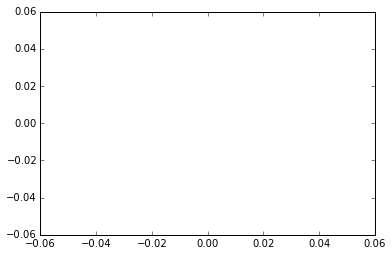

In [69]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')
plt.plot()

[]

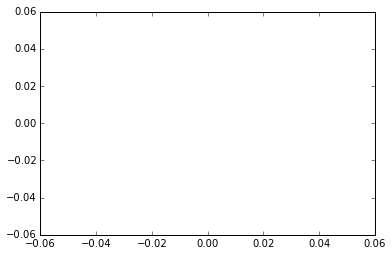

In [70]:
ax.legend(loc='best')
plt.plot()

- label인자를 추가하면 범례가 작성됨
- 범례가 그래프에 표시되게 하기 위해 legend메서도와 위치loc를 지정해 주어야 함.

            ===============   =============
            Location String   Location Code
            ===============   =============
            'best'            0
            'upper right'     1
            'upper left'      2
            'lower left'      3
            'lower right'     4
            'right'           5
            'center left'     6
            'center right'    7
            'lower center'    8
            'upper center'    9
            'center'          10
            ===============   =============

In [81]:
help(legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.
    This is default for all artists, so calling :meth:`leg

### subplot에 주석과 그림 추가

In [73]:
from datetime import datetime

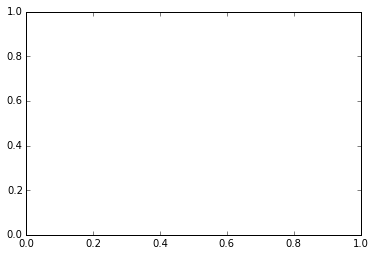

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [115]:
data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
#parse 줄별로 해석
spx = data['SPX']

- data는 spx.csv파일이고, spx는 data중 SPX시트를 의미

In [103]:
type(spx)

pandas.core.series.Series

In [116]:
spx.plot(ax=ax, style='k-')

- 중요한 날 지정

In [117]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

#### annotate 메서드
- label : 라벨달기
- xytext : 주석 표시 위치
- arrowprops : 화살표 색과 크기
- horizontalalignment + verticalalignment : 주석 표기 위치

In [118]:
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')
plt.plot()

[]

In [107]:
help(annotate)

Help on function annotate in module matplotlib.pyplot:

annotate(*args, **kwargs)
    Create an annotation: a piece of text referring to a data
    point.
    
    Parameters
    ----------
    s : string
        label
    
    xy : (x, y)
        position of element to annotate
    
    xytext : (x, y) , optional, default: None
        position of the label `s`
    
    xycoords : string, optional, default: "data"
        string that indicates what type of coordinates `xy` is. Examples:
        "figure points", "figure pixels", "figure fraction", "axes
        points", .... See `matplotlib.text.Annotation` for more details.
    
    textcoords : string, optional
        string that indicates what type of coordinates `text` is. Examples:
        "figure points", "figure pixels", "figure fraction", "axes
        points", .... See `matplotlib.text.Annotation` for more details.
        Default is None.
    
    arrowprops : `matplotlib.lines.Line2D` properties, optional
        Dictionary

In [119]:
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
plt.plot()


[]

In [120]:
ax.set_title('Important dates in 2008-2009 financial crisis')
plt.plot()

[]

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

-----------------------------------

- patches를 이용해서 도표에 도형을 추가도 가능
- subplots에 add_patch를 호출하면 됨

In [141]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    An arbitrary number of *x*, *y*, *fmt* groups can be
    specified, as in::
    
        a.plot(x1, y1, 'g^', x2, y2, 'g-')
    
    Return value is a list of lines that were added.
    
    By default, each line is assigned a different color specified by a
    'color cycle'.  To change this behavior, you can 

In [142]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [143]:
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

- 사각형, 원, 삼각형 정의
- 사각형: 시작점, +가로, +세로, 색, 투명도
- 원: (원의 중심), 반지름, 색, 투명도
- 다(삼)각형: 다(세)점의 위치, 색, 투명도 

In [146]:
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.plot()

[]

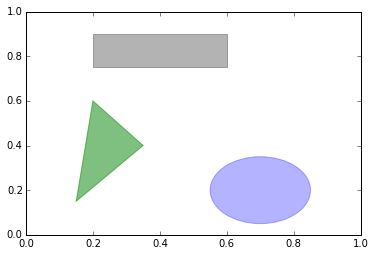

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([(0.15, 0.15), (0.35, 0.4), (0.2, 0.6)],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 그래프를 파일로 저장

- plt.savefig 메서드를 이용하면 활성화된 그래프를 파일로 저장 가능

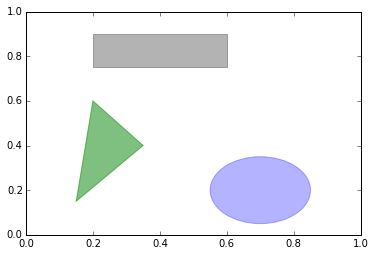

In [77]:
fig

In [78]:
help(fig.savefig)

Help on method savefig in module matplotlib.figure:

savefig(self, *args, **kwargs) method of matplotlib.figure.Figure instance
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Arguments:
    
      *fname*:
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a strin

In [82]:
fig.savefig('figpath.png')

In [150]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

- .svg .pdf .png 등으로 저장 가능
- dpi: 인치당 도트 해상도
- bbox_inches:그래프 공백 잘라내기

In [84]:
from io import BytesIO
buffer = BytesIO()
buffer

In [85]:
plt.savefig(buffer)
plot_data = buffer.getvalue()

- StringIO와 같이 웹을 통해 동적으로 생성된 이미지를 보여줄 수도 있음

### matplotlib 설정

- 도표 크기, subolots 간격, 색상, 글자 크기, 격자 스타일 등 설정 가능
- 환경 설정 방법: rc 메서드 활용
- rc 메서드의 첫 번째 인자로 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend' 설정 가능
- dict 형태로 저장하면 더 편리

[]

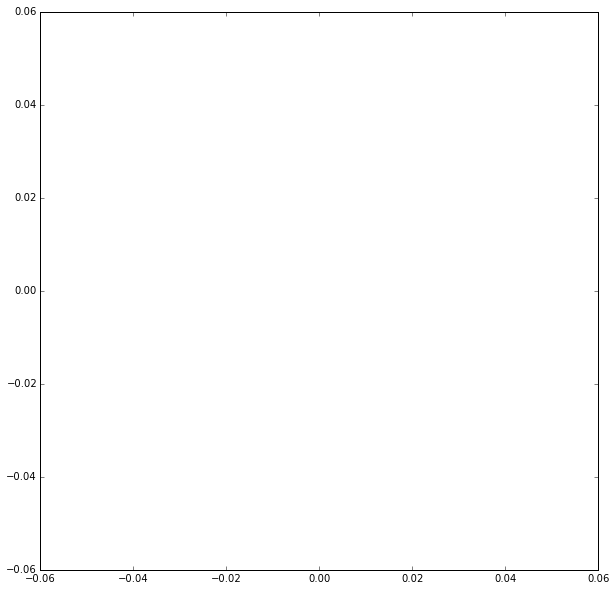

In [86]:
plt.rc('figure', figsize=(10, 10))
plt.plot()

## pandas에서 그래프 그리기

- matplotlib은 저수준 도구임
- 데이터 형태, 범례, 제목 등을 하나하나 입력후 조합해야 하기 때문에 불편함
- pandas를 이용해 그리는 것이 더 효과적

pandas plotting documents:
http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 선 그래프

- Series, DataFrame 모두 plot 메서드를 이용해 그래프 생성 가능
- plot메서드의 기본은 선그래프

In [ ]:
plt.close('all')

In [159]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

- Series 객체의 색인은 matplotlib에서 그래프를 생성할 때 X축으로 해석!
- X축의 눈금, 한계: xticks, xlim 옵션

In [156]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

- ex) a = np.array([[1,2,3], [4,5,6]])
- np.cumsum(a,axis=0)      # sum over rows for each of the 3 columns

- np.cumsum(a,axis=1)      # sum over columns for each of the 2 rows


# ======================================

In [87]:
%pwd

u'/home/kwangyounjung/Workspace/python-study/study_session/data_analysis/pydal/ch08'

In [88]:
a = pd.read_csv('iris.csv')

In [90]:
a.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
a.set_index(['Species']).head()
aa = a.set_index(['Species']).head()

In [101]:
plt.figure()

---

### Bar plots

In [ ]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [ ]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [ ]:
plt.figure()

In [ ]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [ ]:
tips = pd.read_csv('ch08/tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

### Histograms and density plots

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot(kind='kde')

In [ ]:
plt.figure()

In [ ]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [ ]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

In [ ]:
plt.figure()

In [ ]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In [ ]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [ ]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()

In [ ]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

In [ ]:
data['CATEGORY'][:6]

In [ ]:
data.describe()

In [ ]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [ ]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [ ]:
get_english('2. Urgences logistiques | Vital Lines')

In [ ]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

In [ ]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [ ]:
dummy_frame.ix[:, :6].info()

In [ ]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [ ]:
data.ix[:, 10:15].info()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        

In [ ]:
make_plot()

In [ ]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')